# Importing Libraries

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import  re

# Feature Engineering
from sklearn.preprocessing import LabelEncoder

# KMean Clustering
from sklearn.cluster import KMeans

# Importing Dataset

Link : https://raw.githubusercontent.com/mayursrt/customer-segmentation-using-k-means/main/data/Mall_Customers.csv

In [45]:
data = pd.read_csv(r"https://raw.githubusercontent.com/mayursrt/customer-segmentation-using-k-means/main/data/Mall_Customers.csv")

In [46]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [47]:
data.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


* Conclusions

1. No Null Value
2. Gender has the dtype of object

In [49]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


* Conclusions

1. Avg. age of Customer is 38
2. Customer that visits the mall is having the age b/w 18 to 70
3. Having the Avg. annual income as $60k

<Axes: xlabel='Age', ylabel='count'>

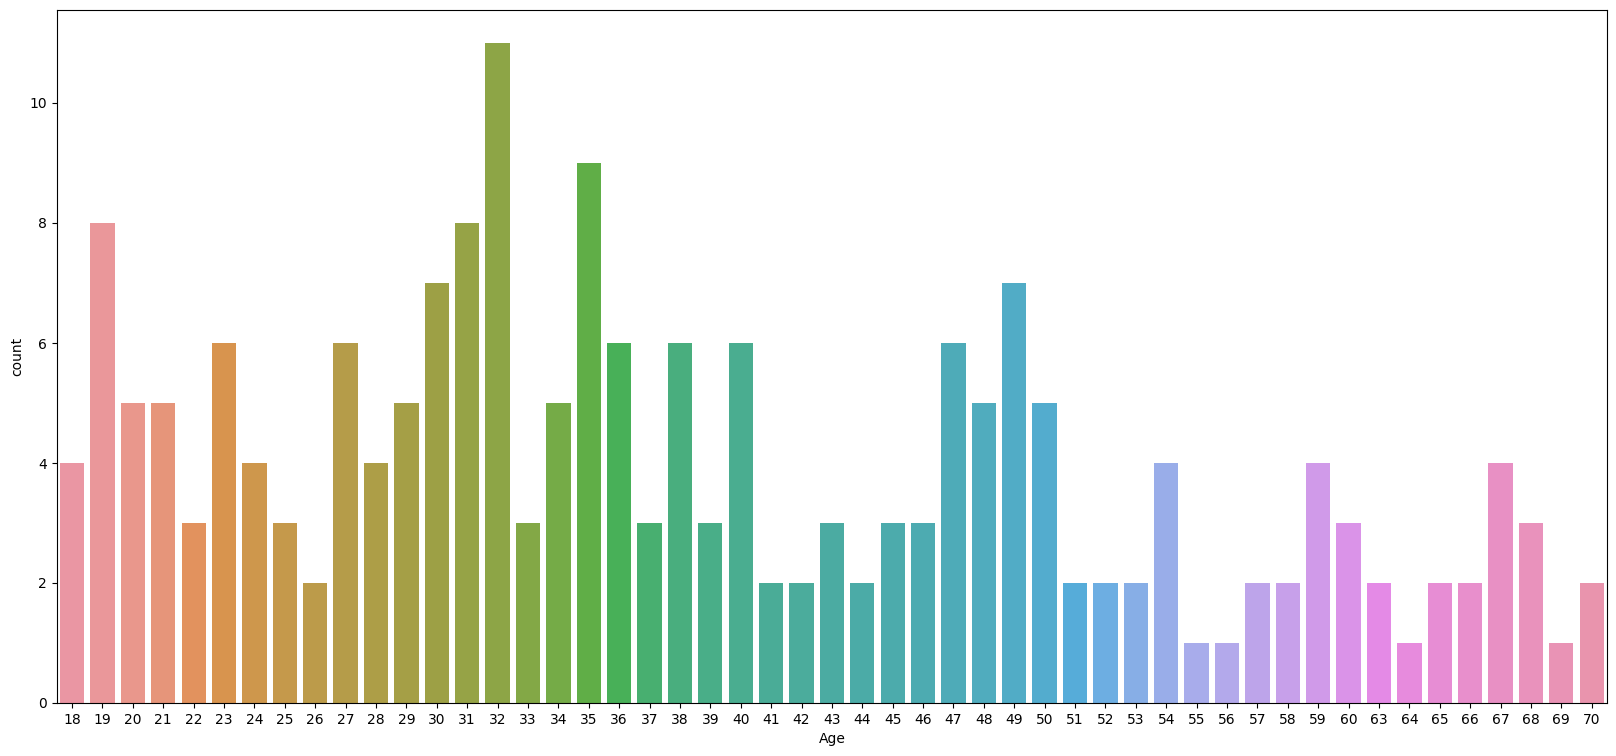

In [50]:
plt.figure(figsize=(20,9))
sns.countplot(data=data,x='Age')

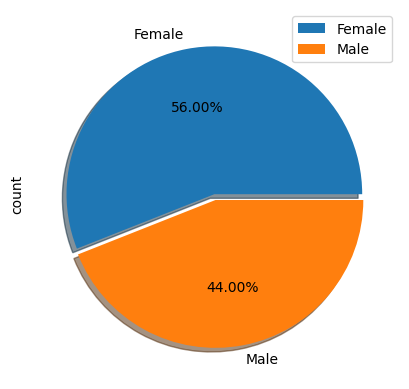

In [51]:
data['Gender'].value_counts().plot(kind='pie',autopct = '%.2f%%',shadow=True,explode=(0,0.04))
plt.legend()

* Conclusion

1. No. of females > No. of males
2. Females are 12% more than Male
3. Female visits the mall most of the time.

Distribution of Income

<Axes: xlabel='Annual Income (k$)', ylabel='count'>

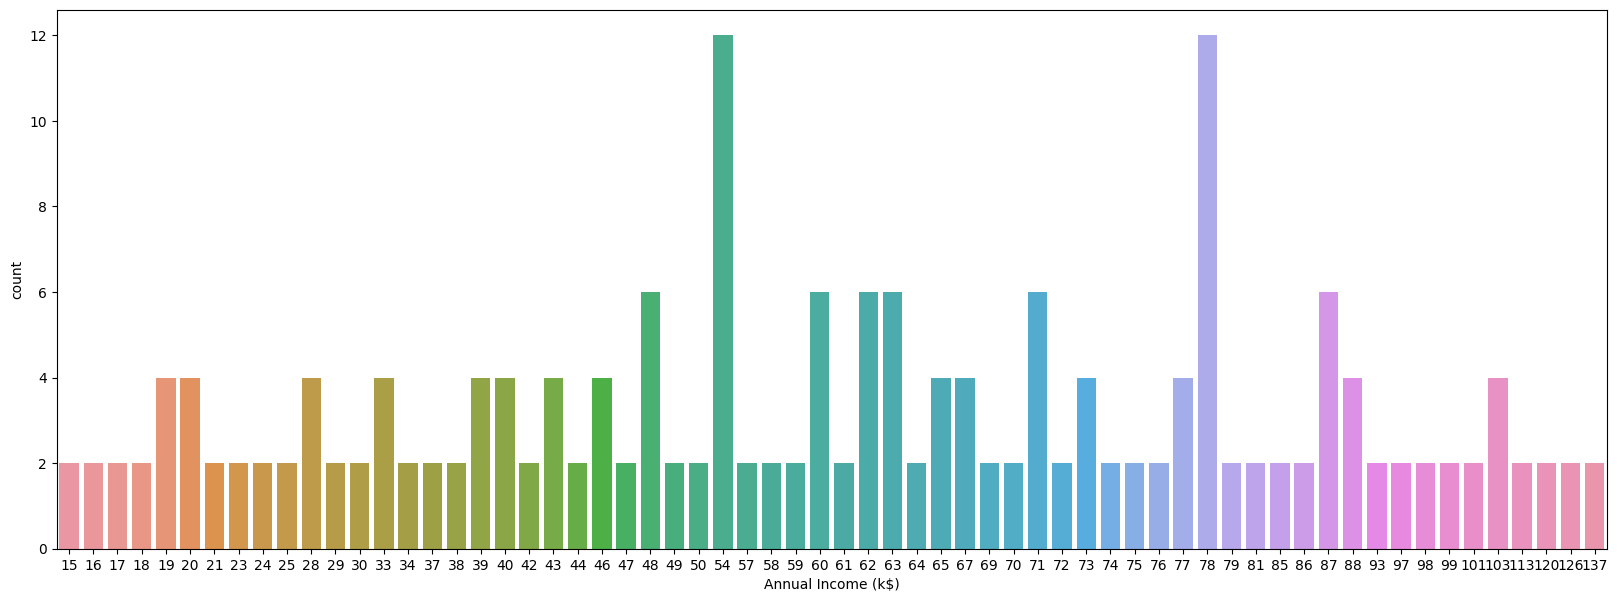

In [55]:
plt.figure(figsize=(20,7))
sns.countplot(data=data, x='Annual Income (k$)')

* Conclusions
1. The customers that are having the salary of $54(k) and $78(K), visits the mall most of time

Show the Annual Income Distribution w.r.t. to the Gender

<Axes: xlabel='Annual Income (k$)', ylabel='Count'>

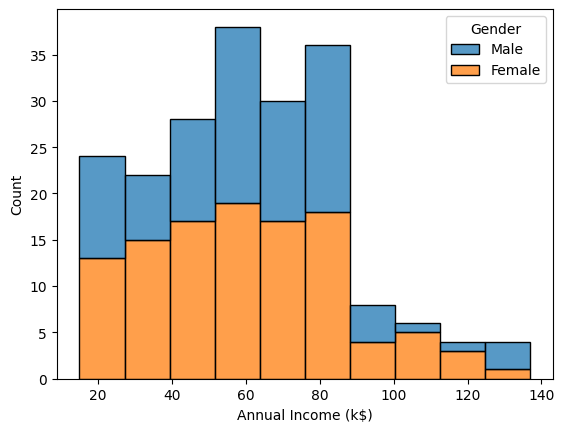

In [68]:
sns.histplot(data,x='Annual Income (k$)',hue='Gender',multiple='stack')

In [71]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


c:\Users\ABC\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


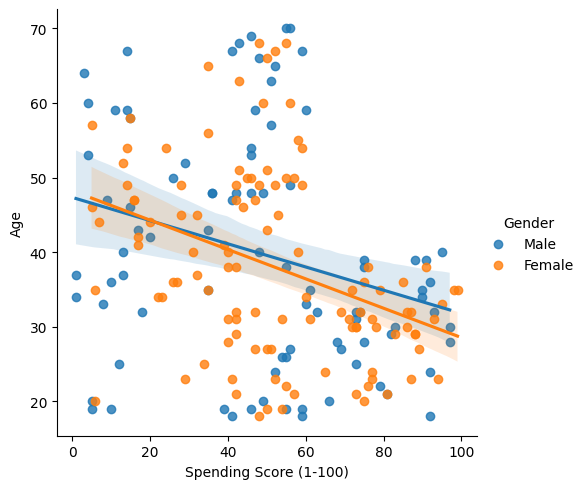

In [72]:
sns.lmplot(data=data, x='Spending Score (1-100)',y='Age',hue='Gender')

# Machine Learning

# Feature Engineering

For Gender column

In [80]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [81]:
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])

In [82]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


Droping the CustomerID column

In [83]:
data.drop(columns={'CustomerID'},inplace=True)

In [85]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


# KMean Clustering

In [119]:
kmod = KMeans(n_clusters=5)

In [120]:
kmod.fit(data)
# or
# kmod.fit_predict(data)

c:\Users\ABC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

In [126]:
pre = kmod.predict(data)

In [127]:
pre 

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

In [128]:
kmod.cluster_centers_

array([[ 0.39130435, 25.52173913, 26.30434783, 78.56521739],
       [ 0.41772152, 43.08860759, 55.29113924, 49.56962025],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513],
       [ 0.39130435, 45.2173913 , 26.30434783, 20.91304348],
       [ 0.52777778, 40.66666667, 87.75      , 17.58333333]])

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

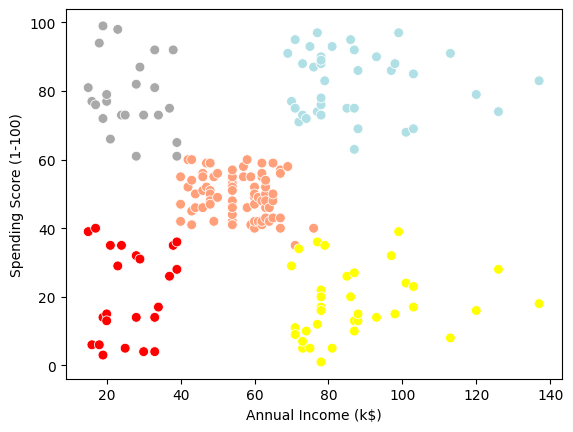

In [133]:
color = np.array(['darkgray', 'lightsalmon', 'powderblue', 'red', 'yellow', 'black'])
sns.scatterplot(x = data['Annual Income (k$)'],
                y = data['Spending Score (1-100)'],
                c=color[kmod.labels_],
                s=50)

In [101]:
km = []
for i in range(1, 12):
    kmodel = KMeans(n_clusters=i,n_init=15,max_iter=500)
    kmodel.fit(data)
    km.append(kmodel.inertia_)

In [102]:
km

[308862.06,
 212889.442455243,
 143391.59236035674,
 104414.67534220166,
 75399.61541401484,
 58348.64136331505,
 51147.01731797614,
 44355.31351771352,
 40655.68621378621,
 37521.886613261464,
 34870.8268155695]

Text(0.5, 1.0, 'Elbow plot')

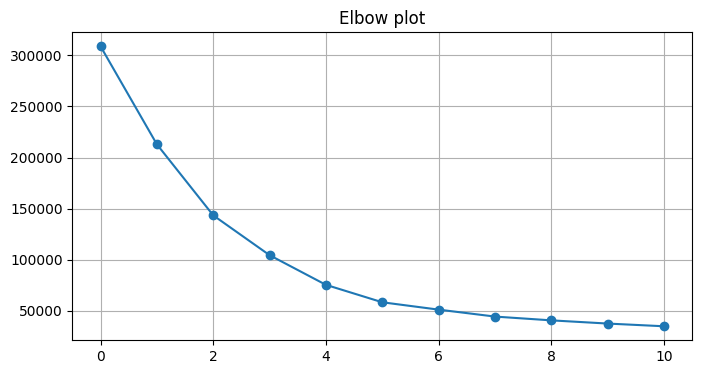

In [123]:
plt.figure(figsize=(8,4))
plt.plot(km,marker='o')
plt.grid()
plt.title('Elbow plot')

In [134]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [135]:
var = linkage(data,method='ward')

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [45.0, 45.0, 55.0, 55.0],
  [65.0, 65.0, 75.0, 75.0],
  [50.0, 50.0, 70.0, 70.0],
  [35.0, 35.0, 60.0, 60.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [85.0, 85.0, 102.5, 102.5],
  [47.5, 47.5, 93.75, 93.75],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [125.0, 125.0, 142.5, 142.5],
  [165.0, 165.0, 175.0, 175.0],
  [185.0, 185.0, 195.0, 195.0],
  [170.0, 170.0, 190.0, 190.0],
  [133.75, 133.75, 180.0, 180.0],
  [70.625, 70.625, 156.875, 156.875],
  [12.5, 12.5, 113.75, 113.75],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [235.0, 235.0, 245.0, 245.0],
  [265.0, 265.0, 275.0, 275.0],
  [255.0, 255.0, 270.0, 270.0],
  [240.0, 240.0, 262.5, 262.5],
  [212.5, 212.5, 251.25, 251.25],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [315.0, 315.0, 325.0, 325.0],
  [345.0, 345.0, 355.0, 355.0],
  [335.0, 335.0, 350.0, 350.0],
  [320.0, 320.0, 342

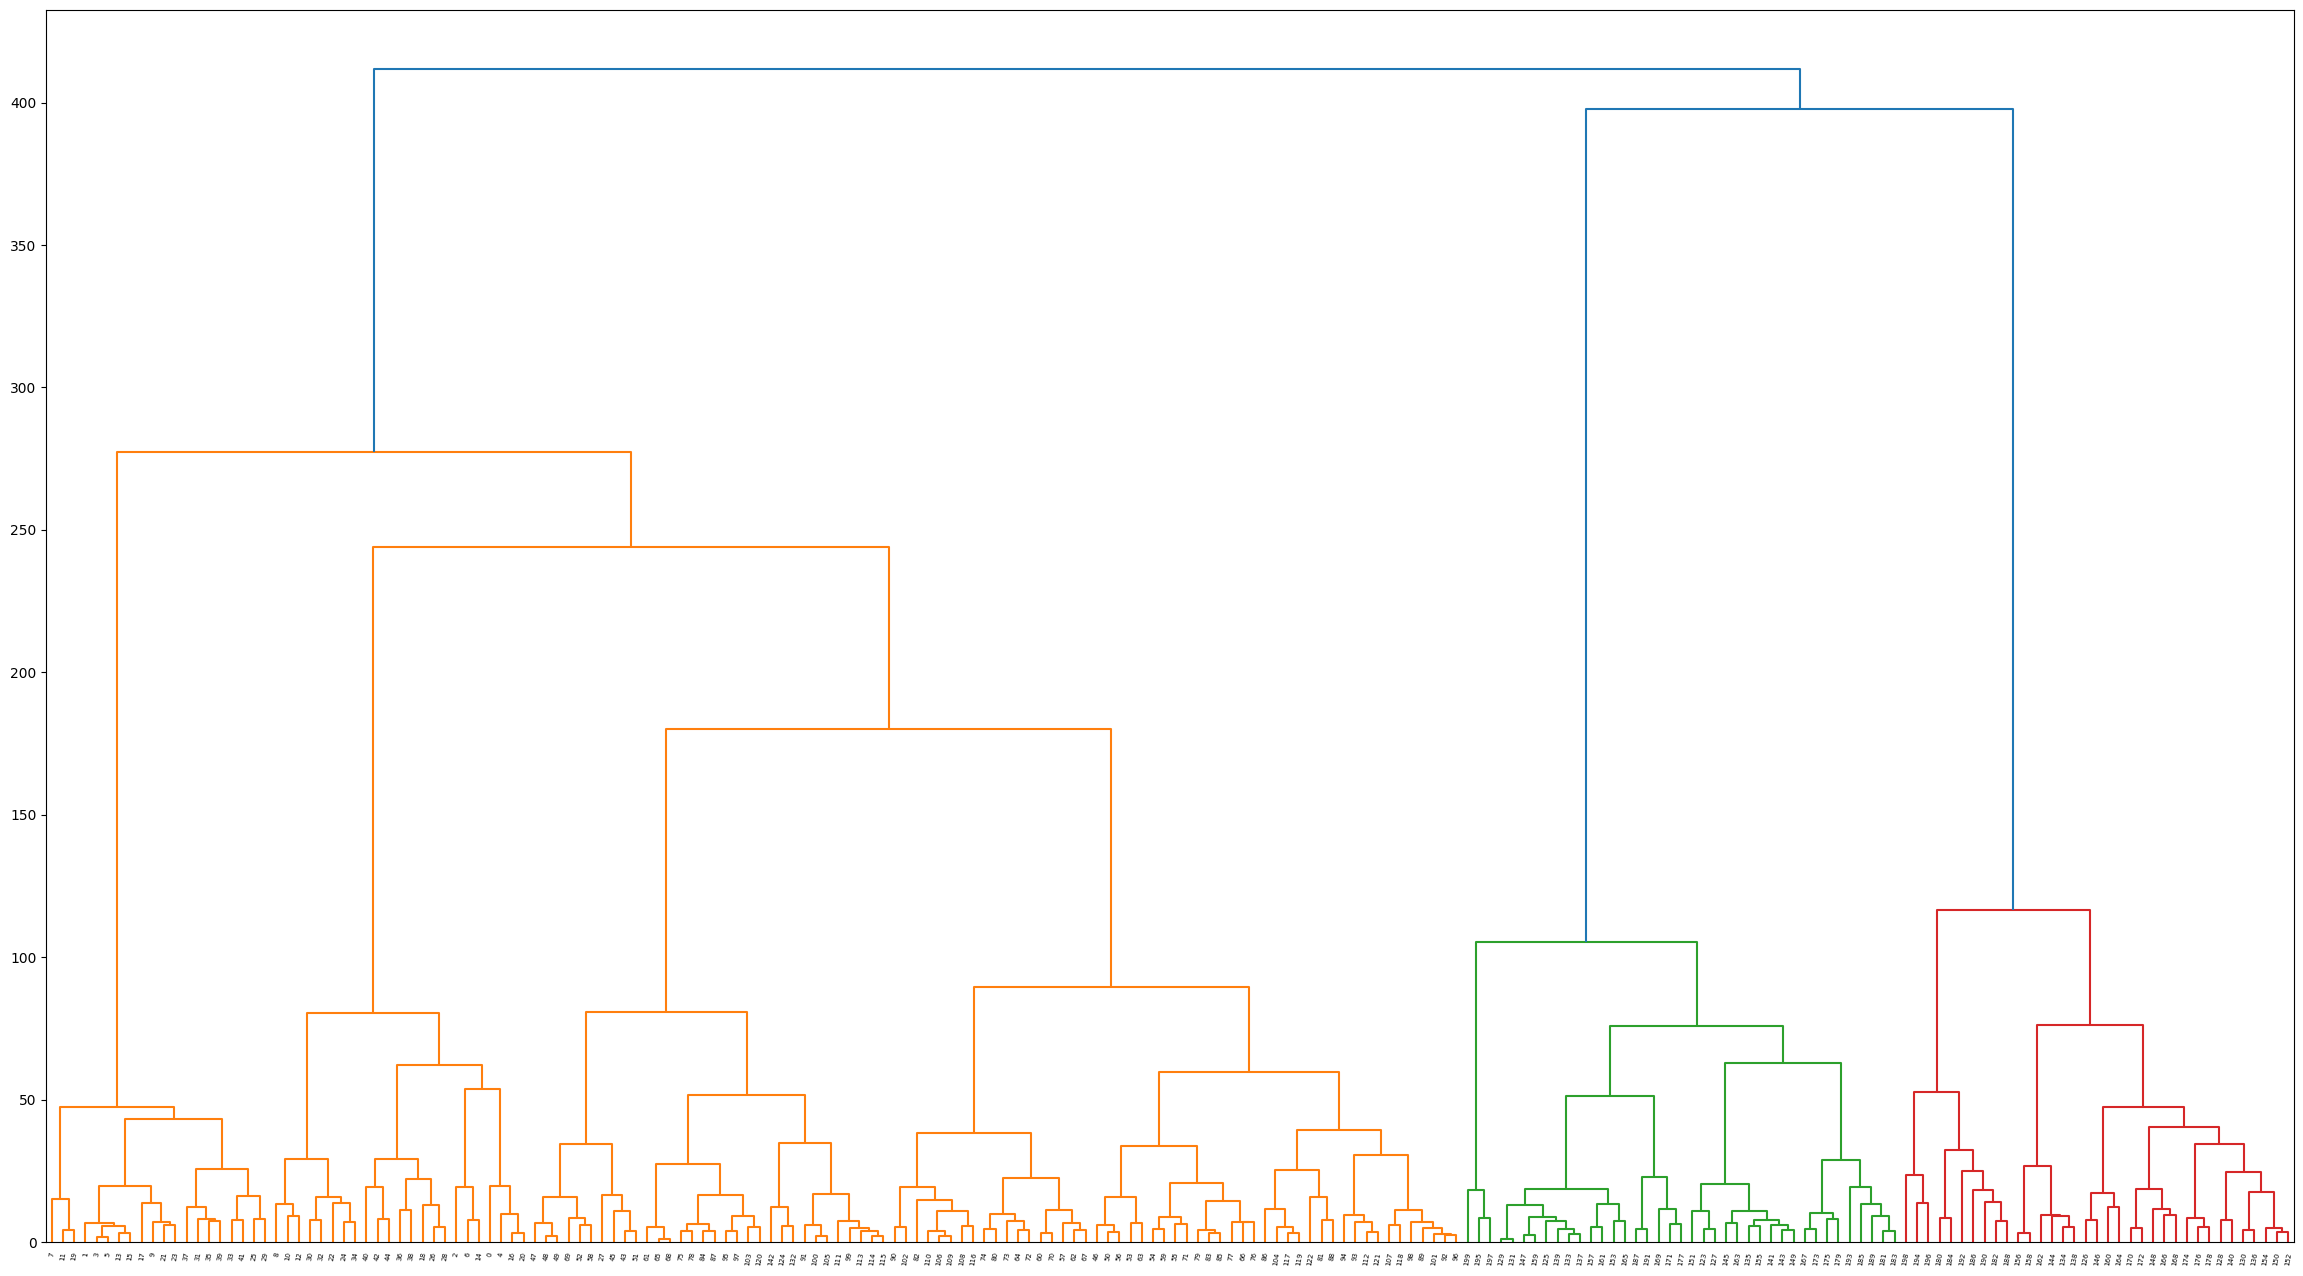

In [138]:
plt.figure(figsize=(29,16))
dendrogram(var, leaf_rotation=80)